In [2]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df = pd.get_dummies(df, drop_first=True)
df.drop("User ID", axis=1, inplace=True )
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [5]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [7]:
# Split Input and Output
x_values = df.iloc[:,df.columns != 'Purchased']
y_values = df.iloc[:,df.columns == 'Purchased']

In [19]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=1)

In [37]:
# import SVM
from sklearn.svm import SVC # Support Vector Classifier
model = SVC(kernel = 'rbf', random_state = 0, probability=True)
model.fit(x_train, y_train)

c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [41]:
# prediction
y_pred = model.predict(x_test)

In [40]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_test, y_pred)
print(cm)

[[64  8]
 [32 16]]


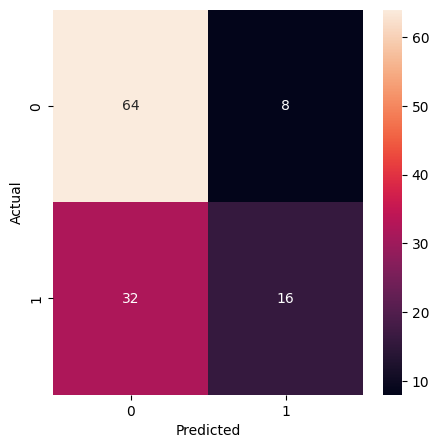

In [42]:
# Confusion Matrix Visualization
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Report
from sklearn.metrics import classification_report as cr
report = cr(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        72
           1       0.67      0.33      0.44        48

    accuracy                           0.67       120
   macro avg       0.67      0.61      0.60       120
weighted avg       0.67      0.67      0.63       120



In [44]:
# Calculate all metrics for display in markdown cells
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Get confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Accuracy: 0.6667 (66.67%)
Precision: 0.6667 (66.67%)
Recall: 0.3333 (33.33%)
F1-Score: 0.4444 (44.44%)

Confusion Matrix:
True Negatives: 64
False Positives: 8
False Negatives: 32
True Positives: 16


## Question: Overall, how often is the model correct?

**Answer:** The model is correct **66.67%** of the time

- **Accuracy Score: 0.6667**
- This means out of 120 predictions, the model got 80 correct
- The SVM model performance is moderate with an accuracy of 67%

## Question: When the model predicts "Purchased", how often is it right?

**Answer:** When the model predicts "Purchased", it's correct **66.67%** of the time

- **Precision Score: 0.6667**
- Out of 24 "Purchased" predictions, 16 were actually correct
- This means 8 predictions were false positives (predicted purchase but didn't actually purchase)
- The SVM has moderate precision - it's somewhat reliable when it predicts a purchase

## Question: Of all customers who actually purchased, how many did we catch?

**Answer:** We correctly identified **33.33%** of customers who actually purchased

- **Recall Score: 0.3333**
- Out of 48 customers who actually purchased, we caught only 16 of them
- We missed 32 potential customers (false negatives)
- The SVM has low recall and needs significant improvement in catching purchasing customers

## Question: What's the balanced score between precision and recall?

**Answer:** The balanced F1-score is **44.44%**

- **F1-Score: 0.4444**
- This balances precision (66.67%) and recall (33.33%)
- F1-score closer to 1 is better - our score of 0.44 indicates poor performance
- The SVM shows significant imbalance, heavily favoring precision over recall

## Question: How many predictions were correct vs incorrect for each class?

**Answer:** Confusion Matrix Breakdown:

| Prediction Type | Count | Description |
|---|---|---|
| ✅ **True Negatives** | **64** | Correctly predicted "Not Purchased" |
| ❌ **False Positives** | **8** | Incorrectly predicted "Purchased" |
| ❌ **False Negatives** | **32** | Missed actual "Purchased" |
| ✅ **True Positives** | **16** | Correctly predicted "Purchased" |

**Summary:**
- **Total Correct Predictions: 80** (64 + 16)
- **Total Incorrect Predictions: 40** (8 + 32)
- **Total Test Cases: 120**

**Analysis:** The SVM is very conservative, missing many actual purchases (32 false negatives) but avoiding most false alarms (only 8 false positives).

## Question: How does SVM compare to other models?

**Answer:** SVM vs Other Models Performance Comparison:

| Metric | SVM | Decision Tree | Random Forest | Best Model |
|---|---|---|---|---|
| **Accuracy** | 66.67% | 84.17% | 85.83% | 🏆 Random Forest |
| **Precision** | 66.67% | 82.22% | 77.19% | 🏆 Decision Tree |
| **Recall** | 33.33% | 77.08% | 91.67% | 🏆 Random Forest |
| **F1-Score** | 44.44% | 79.57% | 83.81% | 🏆 Random Forest |

**Key Insights:**
- **SVM performs worst** across all metrics with this dataset
- **Random Forest** is the best overall performer
- **SVM's low recall** (33.33%) means it misses most potential customers
- **SVM might need hyperparameter tuning** to improve performance

In [45]:
print("="*50)
print("METHOD 1: DIRECT INPUT")
print("="*50)
# Direct input (change these values to test different scenarios)
age = 35
gender = "M"  # "M" for Male, "F" for Female
salary = 50000

print(f"\nTesting with: Age={age}, Gender={gender}, Salary=${salary:,}")

# Uncomment the lines below if you want to use interactive input:
# age = int(input("Enter Age: "))
# gender = input("Enter Gender (M / F): ")
# salary = int(input("Enter Estimated Salary: "))

METHOD 1: DIRECT INPUT

Testing with: Age=35, Gender=M, Salary=$50,000


In [46]:
# Preprocess input value of gender to 0 and 1
if gender.upper() == 'M':
    gender_encoded = 1  # Male = 1
else:
    gender_encoded = 0  # Female = 0

# Create input array for prediction
user_input = [[age, salary, gender_encoded]]

# Make prediction
prediction = model.predict(user_input)
prediction_proba = model.predict_proba(user_input)

# Display result
if prediction[0] == 1:
    result = "Will Purchase"
    confidence = prediction_proba[0][1] * 100
else:
    result = "Will Not Purchase"
    confidence = prediction_proba[0][0] * 100

print(f"\n=== SVM Prediction ===")
print(f"Customer Profile: {age} years old, {gender}, ${salary:,} salary")
print(f"Prediction: {result}")
print(f"Confidence: {confidence:.2f}%")

# Show probability breakdown
print(f"\nProbability Breakdown:")
print(f"  Will NOT Purchase: {prediction_proba[0][0]*100:.2f}%")
print(f"  Will Purchase: {prediction_proba[0][1]*100:.2f}%")


=== SVM Prediction ===
Customer Profile: 35 years old, M, $50,000 salary
Prediction: Will Not Purchase
Confidence: 82.91%

Probability Breakdown:
  Will NOT Purchase: 82.91%
  Will Purchase: 17.09%


c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [47]:
# Test with multiple scenarios
print("\n" + "="*50)
print("TESTING MULTIPLE SCENARIOS")
print("="*50)

test_cases = [
    {"age": 25, "gender": "F", "salary": 30000, "description": "Young female, low salary"},
    {"age": 35, "gender": "M", "salary": 80000, "description": "Middle-aged male, high salary"},
    {"age": 45, "gender": "F", "salary": 60000, "description": "Older female, medium salary"},
    {"age": 22, "gender": "M", "salary": 25000, "description": "Young male, low salary"},
    {"age": 40, "gender": "M", "salary": 90000, "description": "Mature male, high salary"}
]

for i, case in enumerate(test_cases, 1):
    # Encode gender
    gender_enc = 1 if case["gender"] == "M" else 0
    
    # Make prediction
    user_data = [[case["age"], case["salary"], gender_enc]]
    pred = model.predict(user_data)
    pred_prob = model.predict_proba(user_data)
    
    # Determine result
    result = "Will Purchase" if pred[0] == 1 else "Will Not Purchase"
    confidence = pred_prob[0][1]*100 if pred[0] == 1 else pred_prob[0][0]*100
    
    print(f"\nTest {i}: {case['description']}")
    print(f"  Profile: {case['age']} years, {case['gender']}, ${case['salary']:,}")
    print(f"  Prediction: {result} ({confidence:.1f}% confidence)")


TESTING MULTIPLE SCENARIOS

Test 1: Young female, low salary
  Profile: 25 years, F, $30,000
  Prediction: Will Not Purchase (78.0% confidence)

Test 2: Middle-aged male, high salary
  Profile: 35 years, M, $80,000
  Prediction: Will Not Purchase (77.4% confidence)

Test 3: Older female, medium salary
  Profile: 45 years, F, $60,000
  Prediction: Will Not Purchase (84.7% confidence)

Test 4: Young male, low salary
  Profile: 22 years, M, $25,000
  Prediction: Will Not Purchase (77.9% confidence)

Test 5: Mature male, high salary
  Profile: 40 years, M, $90,000
  Prediction: Will Not Purchase (61.1% confidence)


c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does 